## Programmatic access to the Allen Brain Cell Atlas

1. Installation
Execute this command in your terminal to install the abc-atlas-access package directly from the source repository.

```{bash}
pip install "git+https://github.com/alleninstitute/abc_atlas_access.git"
```


## AbcProjectCache

`AbcProjectCache` serves as the primary interface for programmatically interacting with the Allen Brain Cell Atlas. This Python class manages the local storage and retrieval of datasets to ensure that files are organized systematically on the user's drive. It handles version control by tracking specific release manifests, which allows to work with consistent data snapshots for reproducibility. By abstracting the logic of file paths and network requests, the class provides a stable mechanism to access large-scale transcriptomic and spatial data without requiring manual file management.

## Install cache files

__Initialize the interface for the Allen Brain Cell Atlas and establish a local directory for data storage__.
The `pathlib` library defines the destination folder, as the API requires `Path` objects rather than strings. 
The `AbcProjectCache` is instantiated using the `from_cache_dir` method to manage data retrieval and version control. To verify the configuration, the code outputs the details of the active manifest. It concludes by listing all downloaded manifests, providing a record of the data versions currently stored locally.


In [9]:
from pathlib import Path
from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

# 1. Define the local folder using pathlib (required by the new API)
download_base = Path("abc_data")

# 2. Initialize using the 'from_cache_dir' helper method
abc_cache = AbcProjectCache.from_cache_dir(download_base)

print("Cache initialized successfully.")
print("Most Current manifest:")
print(abc_cache.current_manifest)
print("----------")
print("All downloaded manifests:")
abc_cache.list_all_downloaded_manifests



Cache initialized successfully.
Most Current manifest:
releases/20251031/manifest.json
----------
All downloaded manifests:


['releases/20251031/manifest.json']

## Inspect Available Methods

The `AbcProjectCache` object provides a streamlined interface for data retrieval through several core functions.


In [12]:
# List all public attributes and methods avoiding internal ones
public_methods = [method for method in dir(abc_cache) if not method.startswith('_')]

print("Available methods and attributes:")
for method in public_methods:
    print(method)

# Examples of common usage signatures (for documentation purposes)
# abc_cache.get_metadata_dataframe(directory='WMB-10X', file_name='cell_metadata')
# abc_cache.get_file_path(directory='WMB-10X', file_name='example_file')

Available methods and attributes:
MANIFEST_COMPATIBILITY
cache
compare_manifests
current_manifest
from_cache_dir
from_local_cache
from_s3_cache
get_data_path
get_directory_expression_matrices
get_directory_expression_matrix_size
get_directory_image_volume_size
get_directory_image_volumes
get_directory_mapmycells
get_directory_mapmycells_size
get_directory_metadata
get_directory_metadata_size
get_directory_size_by_kind
get_file_path
get_metadata_dataframe
get_metadata_path
latest_downloaded_manifest_file
latest_manifest_file
list_all_downloaded_manifests
list_directories
list_expression_matrix_files
list_image_volume_files
list_manifest_file_names
list_mapmycells_files
list_metadata_files
load_latest_manifest
load_manifest
logger
skip_version_check


## Retrieve the names of all available data directories within the Allen Brain Cell Atlas.

A directory designates a specific data collection or experimental modality hosted within the remote repository. It functions as a high-level container that organizes the atlas into distinct datasets, distinguishing between different sequencing methods or biological scopes. 


In [10]:
# List all available directories
directories = abc_cache.list_directories
print("Available directories:")
for d in directories:
    print(d)


Available directories:
ASAP-PMDBS-10X
ASAP-PMDBS-taxonomy
Allen-CCF-2020
Consensus-WMB-AIBS-10X
Consensus-WMB-Macosko-10X
Consensus-WMB-integrated-taxonomy
HMBA-10xMultiome-BG
HMBA-10xMultiome-BG-Aligned
HMBA-BG-taxonomy-CCN20250428
HMBA-MERSCOPE-H22.30.001-BG
HMBA-MERSCOPE-QM23.50.001-BG
HMBA-Xenium-CJ23.56.004-BG
MERFISH-C57BL6J-638850
MERFISH-C57BL6J-638850-CCF
MERFISH-C57BL6J-638850-imputed
MERFISH-C57BL6J-638850-sections
SEAAD-taxonomy
WHB-10Xv3
WHB-taxonomy
WMB-10X
WMB-10XMulti
WMB-10Xv2
WMB-10Xv3
WMB-neighborhoods
WMB-taxonomy
Zeng-Aging-Mouse-10Xv3
Zeng-Aging-Mouse-WMB-taxonomy
Zhuang-ABCA-1
Zhuang-ABCA-1-CCF
Zhuang-ABCA-2
Zhuang-ABCA-2-CCF
Zhuang-ABCA-3
Zhuang-ABCA-3-CCF
Zhuang-ABCA-4
Zhuang-ABCA-4-CCF
mmc-gene-mapper


In [11]:

# Check each directory for expression matrices
for directory in directories:
    try:
        expr_files = abc_cache.list_expression_matrix_files(directory=directory)
        if expr_files:
            print(f"\n{directory} contains expression matrices:")
            for f in expr_files:
                print(f"  {f}")
    except Exception as e:
        pass




ASAP-PMDBS-10X contains expression matrices:
  ASAP-PMDBS-10X/log2
  ASAP-PMDBS-10X/raw

Consensus-WMB-Macosko-10X contains expression matrices:
  Macosko-10X-CB/log2
  Macosko-10X-CB/raw
  Macosko-10X-HPF/log2
  Macosko-10X-HPF/raw
  Macosko-10X-HY/log2
  Macosko-10X-HY/raw
  Macosko-10X-Isocortex/log2
  Macosko-10X-Isocortex/raw
  Macosko-10X-MB/log2
  Macosko-10X-MB/raw
  Macosko-10X-MY-Pons-BS/log2
  Macosko-10X-MY-Pons-BS/raw
  Macosko-10X-OLF/log2
  Macosko-10X-OLF/raw
  Macosko-10X-PAL/log2
  Macosko-10X-PAL/raw
  Macosko-10X-STR/log2
  Macosko-10X-STR/raw
  Macosko-10X-TH/log2
  Macosko-10X-TH/raw

HMBA-10xMultiome-BG contains expression matrices:
  HMBA-10xMultiome-BG-Human/log2
  HMBA-10xMultiome-BG-Human/raw
  HMBA-10xMultiome-BG-Macaque/log2
  HMBA-10xMultiome-BG-Macaque/raw
  HMBA-10xMultiome-BG-Marmoset/log2
  HMBA-10xMultiome-BG-Marmoset/raw

HMBA-10xMultiome-BG-Aligned contains expression matrices:
  HMBA-10xMultiome-BG-Aligned/log2
  HMBA-10xMultiome-BG-Aligned/raw

H

##  Data overview of the 10x Mouse Whole Brain Atlas  ([CCN20230722](https://alleninstitute.github.io/abc_atlas_access/notebooks/cluster_annotation_tutorial.html)).

The Mouse Whole Brain Atlas is a high-resolution transcriptomic and spatial cell-type atlas across the entire mouse brain, integrating several whole-brain single-cell RNA-sequencing (scRNA-seq) datasets. The datasets contain a total of ~4 million cells passing rigorous quality-control (QC) criteria. The integrated transcriptomic taxonomy contains 5,322 clusters that are organized in a hierarchical manner with nested groupings of 34 classes, 338 subclasses, 1,201 supertypes and 5,322 types/clusters. The scRNA-seq data reveal transcriptome-wide gene expression and co-expression patterns for each cell type. The anatomical location of each cell type has been annotated using a comprehensive brain-wide MERFISH dataset with a total of ~4 million segmented and QC-passed cells, probed with a 500-gene panel and registered to the Allen Mouse Brain Common Coordinate Framework (CCF v3). The MERFISH data not only provide accurate spatial annotation of cell types at subclass, supertype and cluster levels, but also reveal fine-resolution spatial distinctions or gradients for cell types. The combination of scRNA-seq and MERFISH data reveals a high degree of correspondence between transcriptomic identity and spatial specificity for each cell type, as well as unique features of cell type organization in different brain regions.

### Clusters
Each of the final set of 5196 cluster is associated with an alias and label. Each row of the dataframe represnts a cluster. Each cluster has a label (human readable string that is unique in the database), cluster alias (in this case a simple integer) and the number of cells that has been grouped into the cluster.

In [5]:
cluster = abc_cache.get_metadata_dataframe(directory='WMB-taxonomy', file_name='cluster')
print(len(cluster))
cluster.head(5)

5322


,cluster_alias,number_of_cells,label
0,1,727,CS20230722_0001
1,10,740,CS20230722_0010
2,100,1053,CS20230722_0100
3,1000,59,CS20230722_1000
4,1001,96,CS20230722_1001


### Cluster annotation term sets
Each level of classification is represented as a cluster annotation term set. Each term set consists of a set of ordered terms. Each term set has a label (human readable string that is unique in the database), a name, description and order among the term sets. Note that these are terms specific to the WMB dataset. The WHB dataset contains supercluster, cluster, subcluster, and neurotransmitter. See the WHB cluster annotation tutorial for more information.

In [6]:
term_set = abc_cache.get_metadata_dataframe(directory='WMB-taxonomy', file_name='cluster_annotation_term_set')
term_set

,label,name,description,order
0,CCN20230722_NEUR,neurotransmitter,Clusters are assigned based on the average exp...,0
1,CCN20230722_CLAS,class,The top level of cell type definition in the m...,1
2,CCN20230722_SUBC,subclass,The coarse level of cell type definition in th...,2
3,CCN20230722_SUPT,supertype,The second finest level of cell type definitio...,3
4,CCN20230722_CLUS,cluster,The finest level of cell type definition in th...,4


### Cluster annotation terms
A cluster annotation term represents a group within a single level of classification. Each term object has a label (human readable string that is unique in the database), a name, which cluster annotation term set it belongs to and a parent or superclass if the term forms a heirarchy, an order within a term set and a color for visualization purposes

In [7]:
term = abc_cache.get_metadata_dataframe(directory='WMB-taxonomy', file_name='cluster_annotation_term', keep_default_na=False)
term.head(5)
term[['label','cluster_annotation_term_set_name']].groupby('cluster_annotation_term_set_name').count()

,label
cluster_annotation_term_set_name,
class,34
cluster,5322
neurotransmitter,10
subclass,338
supertype,1201


It is important to note that term names are only unique within a term set and not unique across term sets. In particular, the name “0001 CLA-EPd-CTX Car3 Glut_1” is used both as supertype and cluster term. These are distinct entities as supertype “0001 CLA-EPd-CTX Car3 Glut_1” has three other distinct cluster members. As such when doing aggregation operations, it is important to the use the term label instead of name. For the name “0001 CLA-EPd-CTX Car3 Glut_1”, the associated label terms are ” CS20230722_SUPT_0001” and “CS20230722_CLUS_000” in the supertype and class level respectively.

### Cluster to cluster annotation membership
The association between a cluster and cluster annotation term is represented as a cluster to cluster annotation membership within the context of one cluster annotation term set. It is expected that a cluster in only associated with one term within a specific term set.

In [7]:
membership = abc_cache.get_metadata_dataframe(directory='WMB-taxonomy', file_name='cluster_to_cluster_annotation_membership')
membership.head(5)

,cluster_annotation_term_label,cluster_annotation_term_set_label,cluster_alias,cluster_annotation_term_name,cluster_annotation_term_set_name,number_of_cells,color_hex_triplet
0,CS20230722_CLUS_0001,CCN20230722_CLUS,128,0001 CLA-EPd-CTX Car3 Glut_1,cluster,4262,#00664E
1,CS20230722_CLUS_0002,CCN20230722_CLUS,129,0002 CLA-EPd-CTX Car3 Glut_1,cluster,3222,#5C79CC
2,CS20230722_CLUS_0003,CCN20230722_CLUS,130,0003 CLA-EPd-CTX Car3 Glut_1,cluster,12216,#86FF4D
3,CS20230722_CLUS_0004,CCN20230722_CLUS,143,0004 CLA-EPd-CTX Car3 Glut_1,cluster,9334,#CC563D
4,CS20230722_CLUS_0005,CCN20230722_CLUS,131,0005 CLA-EPd-CTX Car3 Glut_2,cluster,1056,#E7FF26


# Cell metadata
To efficiently handle data transfer and download, the 4 million cell 10X dataset, was subdivide into 24 expression matrices where cells are grouped by 10X chemistry (10Xv2, 10Xv3 and 10XMulti) and the broad anatomical region from where the cells were dissected from.

In [6]:
import pandas as pd
import numpy as np
import anndata
import time
import matplotlib.pyplot as plt

In [ ]:
abc_cache.list_metadata_files('WMB-10X')

['cell_metadata',
 'cell_metadata_with_cluster_annotation',
 'example_genes_all_cells_expression',
 'gene',
 'region_of_interest_metadata']

In [ ]:
abc_cache.list_metadata_files('WMB-taxonomy')

['cluster',
 'cluster_annotation_term',
 'cluster_annotation_term_set',
 'cluster_annotation_term_with_counts',
 'cluster_to_cluster_annotation_membership',
 'cluster_to_cluster_annotation_membership_color',
 'cluster_to_cluster_annotation_membership_pivoted']

In [ ]:
abc_cache.get_directory_metadata('WMB-taxonomy')

[PosixPath('/Users/arbones/Dropbox/SyncBriefcase/LAB/UK/zz-Allen/abc_data/metadata/WMB-taxonomy/20231215/cluster.csv'),
 PosixPath('/Users/arbones/Dropbox/SyncBriefcase/LAB/UK/zz-Allen/abc_data/metadata/WMB-taxonomy/20231215/cluster_annotation_term.csv'),
 PosixPath('/Users/arbones/Dropbox/SyncBriefcase/LAB/UK/zz-Allen/abc_data/metadata/WMB-taxonomy/20231215/cluster_annotation_term_set.csv'),
 PosixPath('/Users/arbones/Dropbox/SyncBriefcase/LAB/UK/zz-Allen/abc_data/metadata/WMB-taxonomy/20231215/views/cluster_annotation_term_with_counts.csv'),
 PosixPath('/Users/arbones/Dropbox/SyncBriefcase/LAB/UK/zz-Allen/abc_data/metadata/WMB-taxonomy/20231215/cluster_to_cluster_annotation_membership.csv'),
 PosixPath('/Users/arbones/Dropbox/SyncBriefcase/LAB/UK/zz-Allen/abc_data/metadata/WMB-taxonomy/20231215/views/cluster_to_cluster_annotation_membership_color.csv'),
 PosixPath('/Users/arbones/Dropbox/SyncBriefcase/LAB/UK/zz-Allen/abc_data/metadata/WMB-taxonomy/20231215/views/cluster_to_cluster_an

### Download cell metadata

Retrieve the cell-level annotations for the 10x Genomics Whole Mouse Brain (WMB-10X) dataset. The `get_metadata_dataframe` method downloads the relevant CSV file and loads it directly into a pandas DataFrame. 
The `dtype` parameter forces the `cell_label` column to be read as a string, which prevents parsing errors with alphanumeric identifiers. Setting the index to this label establishes a unique key for each cell, facilitating efficient data alignment and lookups. The script concludes by printing the total number of cells and displaying the first five rows to verify the data structure.

In [ ]:
cell = abc_cache.get_metadata_dataframe(
    directory='WMB-10X',
    file_name='cell_metadata',
    dtype={'cell_label': str}
)
cell.set_index('cell_label', inplace=True)
print("Number of cells = ", len(cell))
cell.head(5)

Number of cells =  4042976


,cell_barcode,barcoded_cell_sample_label,library_label,feature_matrix_label,entity,brain_section_label,library_method,region_of_interest_acronym,donor_label,donor_genotype,donor_sex,dataset_label,x,y,cluster_alias,abc_sample_id
cell_label,,,,,,,,,,,,,,,,
GCGAGAAGTTAAGGGC-410_B05,GCGAGAAGTTAAGGGC,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.146826,-3.086639,1,484be5df-5d44-4bfe-9652-7b5bc739c211
AATGGCTCAGCTCCTT-411_B06,AATGGCTCAGCTCCTT,411_B06,L8TX_201029_01_E10,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550851,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.138481,-3.022000,1,5638505d-e1e8-457f-9e5b-59e3e2302417
AACACACGTTGCTTGA-410_B05,AACACACGTTGCTTGA,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.472557,-2.992709,1,a0544e29-194f-4d34-9af4-13e7377b648f
CACAGATAGAGGCGGA-410_A05,CACAGATAGAGGCGGA,410_A05,L8TX_201029_01_A10,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.379622,-3.043442,1,c777ac0b-77e1-4d76-bf8e-2b3d9e08b253
AAAGTGAAGCATTTCG-410_B05,AAAGTGAAGCATTTCG,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.909480,-2.601536,1,49860925-e82b-46df-a228-fd2f97e75d39


In [ ]:
roi = abc_cache.get_metadata_dataframe(directory='WMB-10X', file_name='region_of_interest_metadata')
roi.set_index('acronym', inplace=True)
roi.rename(columns={'order': 'region_of_interest_order',
                    'color_hex_triplet': 'region_of_interest_color'},
           inplace=True)
roi.head(5)

,label,name,region_of_interest_order,region_of_interest_color
acronym,,,,
MO-FRP,WMB-MO-FRP,Somatomotor - Frontal pole,0,#3DCC7C
MOp,WMB-MOp,Primary motor area,1,#179968
SS-GU-VISC,WMB-SS-GU-VISC,Somatosensory/gustatory/visceral areas,2,#2E8599
SSp,WMB-SSp,Primary somatosensory area,3,#5CCCCC
AUD,WMB-AUD,Auditory areas,4,#455A99


In [ ]:
cluster_details = abc_cache.get_metadata_dataframe(
    directory='WMB-taxonomy',
    file_name='cluster_to_cluster_annotation_membership_pivoted',
    keep_default_na=False
)
cluster_details.set_index('cluster_alias', inplace=True)
cluster_details.head(5)

,neurotransmitter,class,subclass,supertype,cluster
cluster_alias,,,,,
1,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3
2,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0327 L2 IT PPP-APr Glut_3
3,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0322 L2 IT PPP-APr Glut_2
4,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0323 L2 IT PPP-APr Glut_2
5,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0325 L2 IT PPP-APr Glut_2


In [ ]:
cluster_colors = abc_cache.get_metadata_dataframe(
    directory='WMB-taxonomy',
    file_name='cluster_to_cluster_annotation_membership_color'
)
cluster_colors.set_index('cluster_alias', inplace=True)
cluster_colors.head(5)

,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cluster_alias,,,,,
1,#2B93DF,#FA0087,#0F6632,#266DFF,#64661F
2,#2B93DF,#FA0087,#0F6632,#266DFF,#CCA73D
3,#2B93DF,#FA0087,#0F6632,#002BCC,#99000D
4,#2B93DF,#FA0087,#0F6632,#002BCC,#5C8899
5,#2B93DF,#FA0087,#0F6632,#002BCC,#473D66


In [ ]:
cell_extended = cell.join(cluster_details, on='cluster_alias')
cell_extended = cell_extended.join(cluster_colors, on='cluster_alias')
cell_extended = cell_extended.join(roi[['region_of_interest_order', 'region_of_interest_color']], on='region_of_interest_acronym')
cell_extended.head(5)

,cell_barcode,barcoded_cell_sample_label,library_label,feature_matrix_label,entity,brain_section_label,library_method,region_of_interest_acronym,donor_label,donor_genotype,...,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color,region_of_interest_order,region_of_interest_color
cell_label,,,,,,,,,,,,,,,,,,,,,
GCGAGAAGTTAAGGGC-410_B05,GCGAGAAGTTAAGGGC,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,...,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3,#2B93DF,#FA0087,#0F6632,#266DFF,#64661F,15,#CCB05C
AATGGCTCAGCTCCTT-411_B06,AATGGCTCAGCTCCTT,411_B06,L8TX_201029_01_E10,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550851,Ai14(RCL-tdT)/wt,...,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3,#2B93DF,#FA0087,#0F6632,#266DFF,#64661F,15,#CCB05C
AACACACGTTGCTTGA-410_B05,AACACACGTTGCTTGA,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,...,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3,#2B93DF,#FA0087,#0F6632,#266DFF,#64661F,15,#CCB05C
CACAGATAGAGGCGGA-410_A05,CACAGATAGAGGCGGA,410_A05,L8TX_201029_01_A10,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,...,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3,#2B93DF,#FA0087,#0F6632,#266DFF,#64661F,15,#CCB05C
AAAGTGAAGCATTTCG-410_B05,AAAGTGAAGCATTTCG,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,...,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3,#2B93DF,#FA0087,#0F6632,#266DFF,#64661F,15,#CCB05C


### UMAP spatial embedding with the metadata
Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualizing and exploring large-dimension datasets. The x, y columns of the cell metadata table represents the coordinate of the all cells UMAP in Figure 1 of the manuscript.

We define a small helper function plot umap to visualize the cells on the UMAP colorized by: dissection region of interest, neurotransmitter identity, cell types division, class and subclass. For ease of demostration, we do a simple subsampling of the cells by a factor of 10 to reduce processing time.

In [ ]:
def plot_umap(xx, yy, cc=None, val=None, fig_width=8, fig_height=8, cmap=None):

    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)
    
    if cmap is not None :
        plt.scatter(xx, yy, s=0.5, c=val, marker='.', cmap=cmap)
    elif cc is not None :
        plt.scatter(xx, yy, s=0.5, color=cc, marker='.')
        
    ax.axis('equal')
    ax.set_xlim(-18, 27)
    ax.set_ylim(-18, 27)
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

In [ ]:
cell_subsampled = cell_extended.loc[::10]
print(len(cell_subsampled))

404298


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


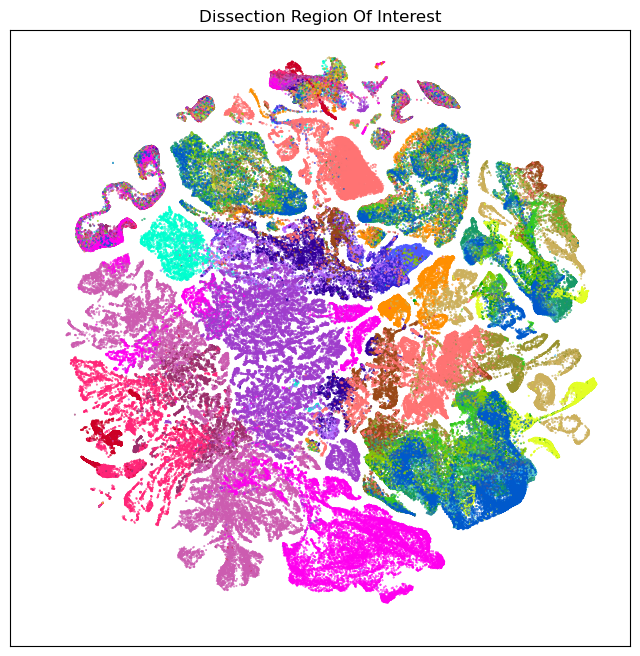

In [ ]:
fig, ax = plot_umap(cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['region_of_interest_color'])
res = ax.set_title("Dissection Region Of Interest")
plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


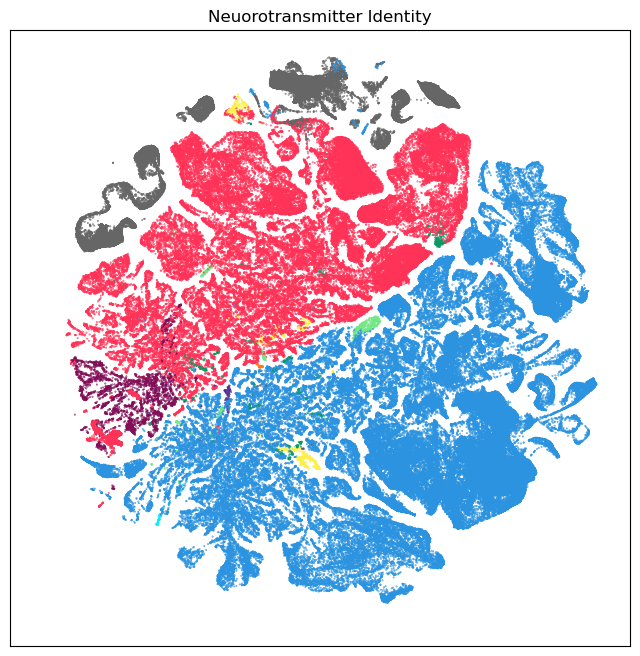

In [ ]:
fig, ax = plot_umap(cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['neurotransmitter_color'])
res = ax.set_title("Neuorotransmitter Identity")
plt.show()


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


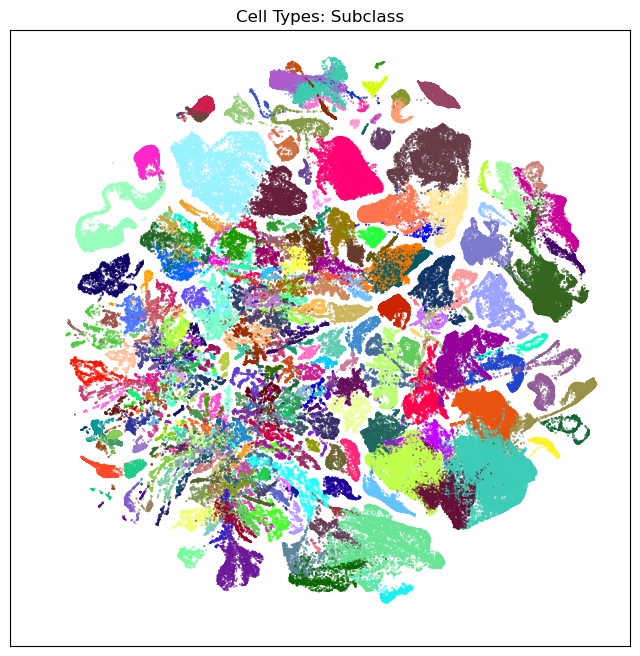

In [ ]:
fig, ax = plot_umap(cell_subsampled['x'], cell_subsampled['y'], cc=cell_subsampled['subclass_color'])
res = ax.set_title("Cell Types: Subclass")
plt.show()

# Single cell gene expression 

## Cell transcriptomes metadata
Each 10x library was sequenced on the Illumina NovaSeq6000 platform, and sequencing reads were aligned to the mouse reference transcriptome mm10 (GENCODE vM23/Ensembl 98) using the 10x Genomics CellRanger pipeline (version 6.1.1) with default parameters. Each gene is uniquely identifier by an Ensembl ID. It is best practice to gene identifier to for tracking and data interchange as gene symbols are not unique and can change over time

Each row of the gene dataframe has Ensembl gene identifier, a gene symbol and name. 1173 genes have no expression across all the cells in the dataset and can be identified by “no expression” in the comment column.

In [13]:
gene = abc_cache.get_metadata_dataframe(directory='WMB-10X', file_name='gene')
gene.set_index('gene_identifier', inplace=True)
print("Number of genes = ", len(gene))
gene.head(5)

Number of genes =  32285


,gene_symbol,name,mapped_ncbi_identifier,comment
gene_identifier,,,,
ENSMUSG00000051951,Xkr4,X-linked Kx blood group related 4,NCBIGene:497097,NaN
ENSMUSG00000089699,Gm1992,predicted gene 1992,NaN,NaN
ENSMUSG00000102331,Gm19938,"predicted gene, 19938",NaN,NaN
ENSMUSG00000102343,Gm37381,"predicted gene, 37381",NaN,NaN
ENSMUSG00000025900,Rp1,retinitis pigmentosa 1 (human),NCBIGene:19888,NaN


In [14]:
pred = (gene['comment'] == 'no expression')
filtered = gene[pred]
print("Number of no expression genes", len(filtered))
filtered

Number of no expression genes 1173


,gene_symbol,name,mapped_ncbi_identifier,comment
gene_identifier,,,,
ENSMUSG00000118272,Arhgef4,Rho guanine nucleotide exchange factor (GEF) 4,NaN,no expression
ENSMUSG00000117809,Asdurf,Asnsd1 upstream reading frame,NCBIGene:110599589,no expression
ENSMUSG00000047383,AC169382.1,novel transcript,NaN,no expression
ENSMUSG00000097001,1700054K02Rik,RIKEN cDNA 1700054K02 gene,NaN,no expression
ENSMUSG00000116048,Sept2,septin 2,NaN,no expression
...,...,...,...,...
ENSMUSG00000091585,AC140365.1,PRAME family member 8-like,NaN,no expression
ENSMUSG00000095523,AC124606.1,PRAME family member 8-like,NCBIGene:100038995,no expression
ENSMUSG00000095475,AC133095.2,uncharacterized LOC545763,NCBIGene:545763,no expression
